# Analysis of Urbanization and Flooding in Addis Ababa and Kampala

# Introduction

This notebook conducts an analysis of the relationship between urban growth, rainfall patterns, and flood extent in two major cities: Addis Ababa and Kampala. The primary objective is to explore and quantify the interplay between these variables over time.
The analysis will proceed as follows:
* **Data Loading and Preparation:** Load the dataset and engineer new, insightful features.
* **Descriptive Statistics:** Summarize the key variables.
* **Exploratory Data Analysis (EDA):** Visualize correlations both overall and on a per-city basis.
* **Time Series Analysis:** Examine trends and stationarity of key metrics over the years.
* **Comparative Analysis:** Statistically compare the two cities to identify significant differences.






# Import Libraries

In [ ]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr

from sklearn.preprocessing import StandardScaler

# Import the 'display' function to render DataFrames nicely in notebooks
from IPython.display import display

# Import the 'warnings' module to manage warning messages
import warnings

# Ignore all warnings for a cleaner output
warnings.filterwarnings("ignore")

# Set a consistent and modern style for all plots
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

# Load and Prepare the Data

In this section, we load the dataset from a CSV file and perform feature engineering to create new variables that will be useful for our analysis.

In [ ]:
# --- Data Loading ---
file_path = "merged_data_new2.csv"
df = pd.read_csv(file_path)

## Feature Engineering

To facilitate a more intuitive analysis, we will create several new features from the existing data.

In [ ]:
# Convert Urban_Area from square meters to square kilometers for better readability
df["Urban_Area_km2"] = df["Urban_Area"] / 1e6

# Calculate the year-over-year urban growth rate for each city
# The first year for each city will have a NaN value, which is expected.
df["Urban_Growth_Rate"] = df.groupby("City")["Urban_Area_km2"].pct_change() * 100

# Calculate Flood Intensity as the ratio of flood extent to urban area
df["Flood_Intensity"] = df["Total_Flood_Extent_km2"] / df["Urban_Area_km2"]

In [ ]:
# Standardize key numerical columns for modeling and comparison
# Standardization (Z-score normalization) rescales features to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
for col in ["Rainfall_mm", "Total_Flood_Extent_km2", "Urban_Area_km2"]:
    df[f"{col}_std"] = scaler.fit_transform(df[[col]])

display(df.head())

,City,Year,Rainfall_mm,Total_Flood_Extent_km2,Urban_Area,Urban_Area_km2,Urban_Growth_Rate,Flood_Intensity,Rainfall_mm_std,Total_Flood_Extent_km2_std,Urban_Area_km2_std
0,Addis Ababa,2005,1174.917609,1966.254434,83318084.00,83.318084,NaN,23.599372,-0.021813,0.447592,-1.539597
1,Addis Ababa,2006,1322.667343,1417.851332,84320897.75,84.320898,1.203597,16.814946,0.587573,-0.469783,-1.504699
2,Addis Ababa,2007,1261.028727,1553.415543,86141302.86,86.141303,2.158901,18.033342,0.333348,-0.243009,-1.441350
3,Addis Ababa,2008,1121.388045,1403.095318,89936037.78,89.936038,4.405244,15.601035,-0.242593,-0.494467,-1.309295
4,Addis Ababa,2009,1158.312130,1529.397062,92625150.10,92.625150,2.990028,16.511682,-0.090301,-0.283188,-1.215715


# Descriptive Statistics

In [ ]:
# Display overall statistics for the dataset
print("\nOverall Dataset Statistics:")
display(
    df[
        ["Rainfall_mm", "Total_Flood_Extent_km2", "Urban_Area_km2", "Urban_Growth_Rate"]
    ].describe()
)


Overall Dataset Statistics:


,Rainfall_mm,Total_Flood_Extent_km2,Urban_Area_km2,Urban_Growth_Rate
count,42.000000,42.000000,42.000000,40.000000
mean,1180.206266,1698.685492,127.559966,1.320760
std,245.395629,605.042365,29.084345,1.489737
min,161.518848,649.491818,83.318084,-1.472011
25%,1122.414474,1186.874929,104.059758,0.440033
50%,1184.903532,1543.016272,121.162800,1.087055
75%,1304.063156,2270.725121,159.432077,2.167023
max,1602.920214,2662.714844,167.064449,4.405244


# Correlation Analysis

## Overall Correlation Matrix

First, we'll compute and visualize a correlation matrix for the entire dataset. This gives us a high-level view of the relationships across both cities combined.


Correlation Matrix of Key Variables:


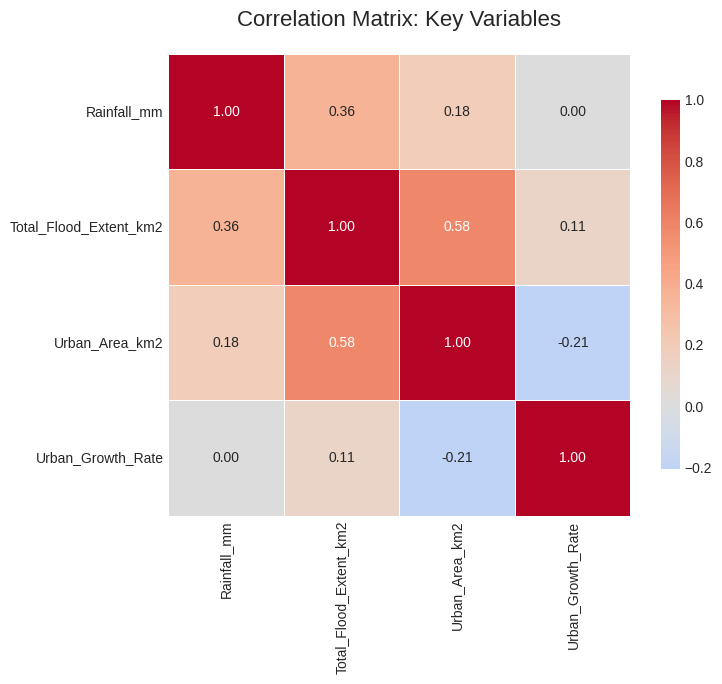

In [ ]:
# Calculate and visualize the correlation matrix
print("\nCorrelation Matrix of Key Variables:")
correlation_vars = [
    "Rainfall_mm",
    "Total_Flood_Extent_km2",
    "Urban_Area_km2",
    "Urban_Growth_Rate",
]
corr_matrix = df[correlation_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix: Key Variables", fontsize=16, pad=20)
plt.show()

**Interpretation:**

From the overall correlation matrix, we can see:

* A moderate positive correlation (0.58) between Urban_Area_km2 and Total_Flood_Extent_km2, suggesting that as urban areas expand, the flood extent tends to increase.
* A weak positive correlation (0.36) between Rainfall_mm and Total_Flood_Extent_km2.
* A weak negative correlation (-0.21) between Urban_Area_km2 and Urban_Growth_Rate, which might be expected as larger cities may have slower percentage growth rates.

## Per-City Correlation Analysis

An overall correlation can sometimes hide or misrepresent trends specific to individual cases. To get a more nuanced understanding, we will now generate separate correlation matrices for each city. This allows us to see if the relationships between variables differ between Addis Ababa and Kampala.


--- City: Addis Ababa ---


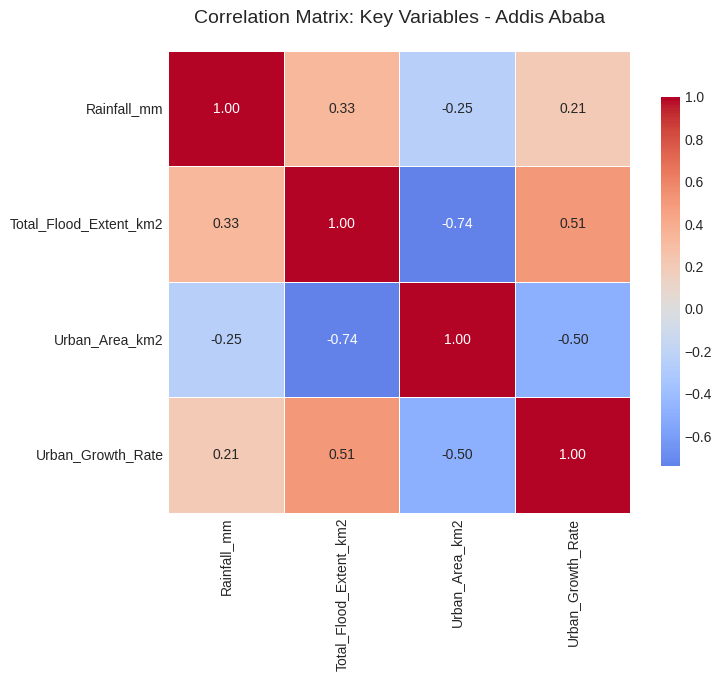


--- City: Kampala ---


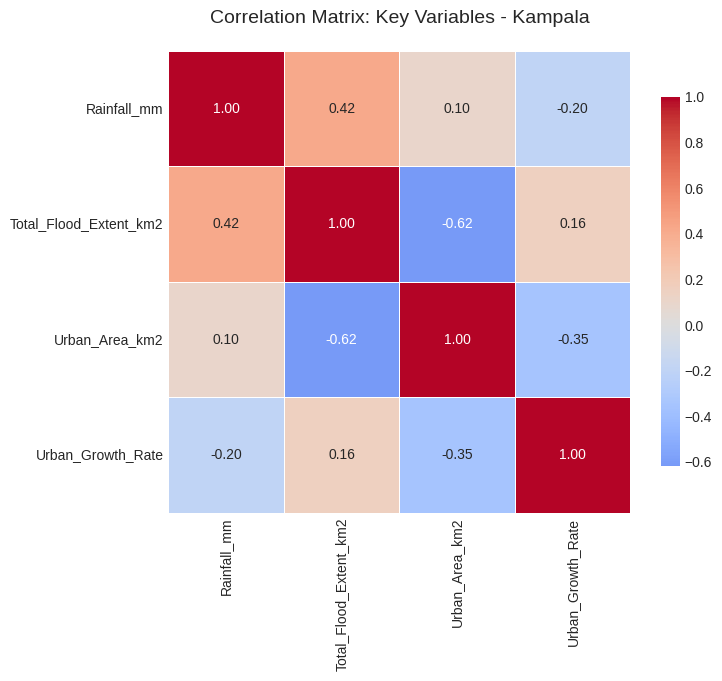

In [ ]:
# Calculate and visualize the correlation matrix for each city
correlation_vars = [
    "Rainfall_mm",
    "Total_Flood_Extent_km2",
    "Urban_Area_km2",
    "Urban_Growth_Rate",
]

# Iterate through each unique city
for city in df["City"].unique():
    print(f"\n--- City: {city} ---")

    # Filter data for the current city
    df_city = df[df["City"] == city].copy()

    # Calculate correlation matrix for the current city, dropping rows with NaN in correlation_vars
    # This handles cases like the first year having NaN Urban_Growth_Rate
    corr_matrix_city = df_city[correlation_vars].dropna().corr()

    # Visualize the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr_matrix_city,
        annot=True,
        cmap="coolwarm",
        center=0,
        fmt=".2f",
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
    )
    plt.title(f"Correlation Matrix: Key Variables - {city}", fontsize=14, pad=20)
    plt.show()

**Interpretation:**

* **Addis Ababa:** A strong negative correlation (-0.74) emerges between Urban_Area_km2 and Total_Flood_Extent_km2. This is counter-intuitive and contradicts the overall trend. It suggests that in Addis Ababa, as the city grew during this period, the flood extent may have decreased, possibly due to flood mitigation efforts or changes in rainfall patterns not captured by the yearly average.

* **Kampala:** The negative correlation between Urban_Area_km2 and Total_Flood_Extent_km2 is also present (-0.62) but slightly weaker than in Addis Ababa.

* In both cities, Urban_Growth_Rate has a moderate positive correlation with Total_Flood_Extent_km2 (0.51 in Addis Ababa, 0.16 in Kampala), suggesting that periods of faster growth might be linked to more extensive flooding.

# TIME SERIES ANALYSIS

In this section, we analyze the variables over time. We will plot the trends for Flood Extent, Rainfall, and Urban Area for each city

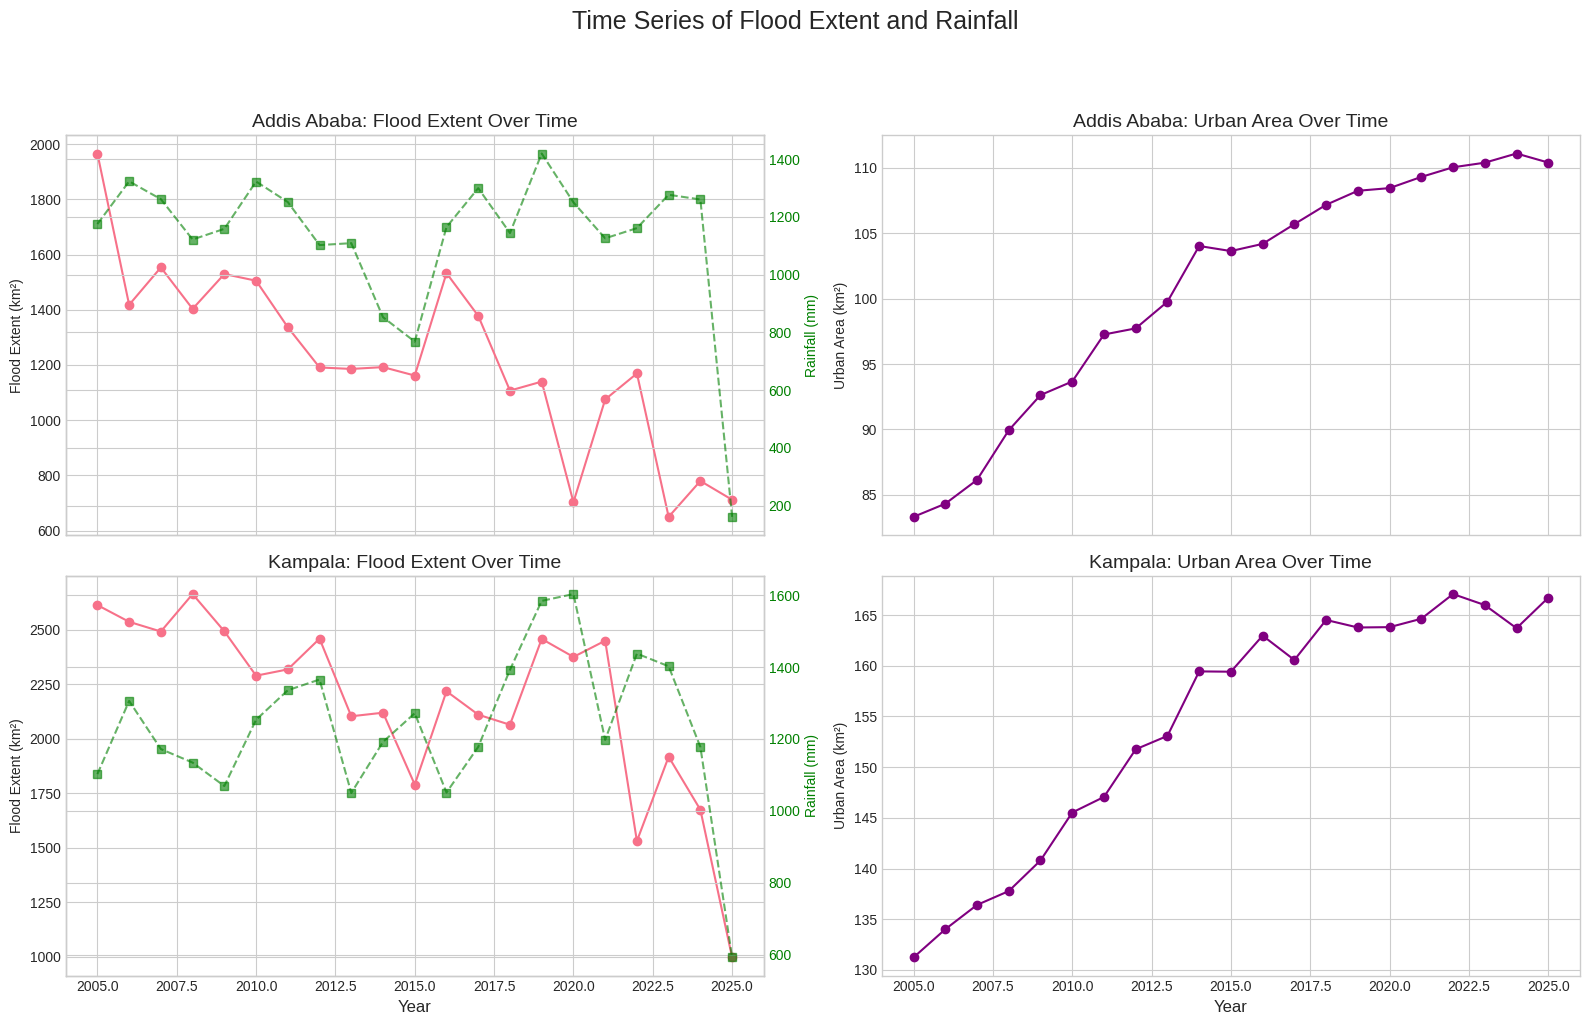

In [ ]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)
fig.suptitle("Time Series of Flood Extent and Rainfall", fontsize=18, y=1.02)

# Loop through each city for analysis
for i, city in enumerate(df["City"].unique()):
    city_data = df[df["City"] == city].set_index("Year").sort_index()

    # --- Plot Time Series ---
    # Plot flood extent
    axes[i, 0].plot(
        city_data.index,
        city_data["Total_Flood_Extent_km2"],
        marker="o",
        linestyle="-",
        label="Flood Extent",
    )
    axes[i, 0].set_title(f"{city}: Flood Extent Over Time", fontsize=14)
    axes[i, 0].set_ylabel("Flood Extent (km²)")

    # Plot rainfall on a secondary y-axis
    ax2 = axes[i, 0].twinx()
    ax2.plot(
        city_data.index,
        city_data["Rainfall_mm"],
        marker="s",
        linestyle="--",
        color="green",
        alpha=0.6,
        label="Rainfall",
    )
    ax2.set_ylabel("Rainfall (mm)", color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    # Plot urban area
    axes[i, 1].plot(
        city_data.index,
        city_data["Urban_Area_km2"],
        marker="o",
        linestyle="-",
        color="purple",
    )
    axes[i, 1].set_title(f"{city}: Urban Area Over Time", fontsize=14)
    axes[i, 1].set_ylabel("Urban Area (km²)")

# Set common x-label
axes[1, 0].set_xlabel("Year", fontsize=12)
axes[1, 1].set_xlabel("Year", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Interpretation of Time Series Plots:**


* **Urban Area:** Both cities show a clear and consistent upward trend in Urban_Area_km2 over the years, indicating continuous urbanization.

* **Flood Extent & Rainfall:** The Total_Flood_Extent_km2 appears more volatile and does not follow a simple linear trend in either city. It visually seems to have some correspondence with the Rainfall_mm series, especially in Kampala.

# COMPARATIVE ANALYSIS BETWEEN CITIES

Finally, we conduct a statistical comparison to determine if the observed differences in rainfall, flood extent, and urban area between Addis Ababa and Kampala are statistically significant.

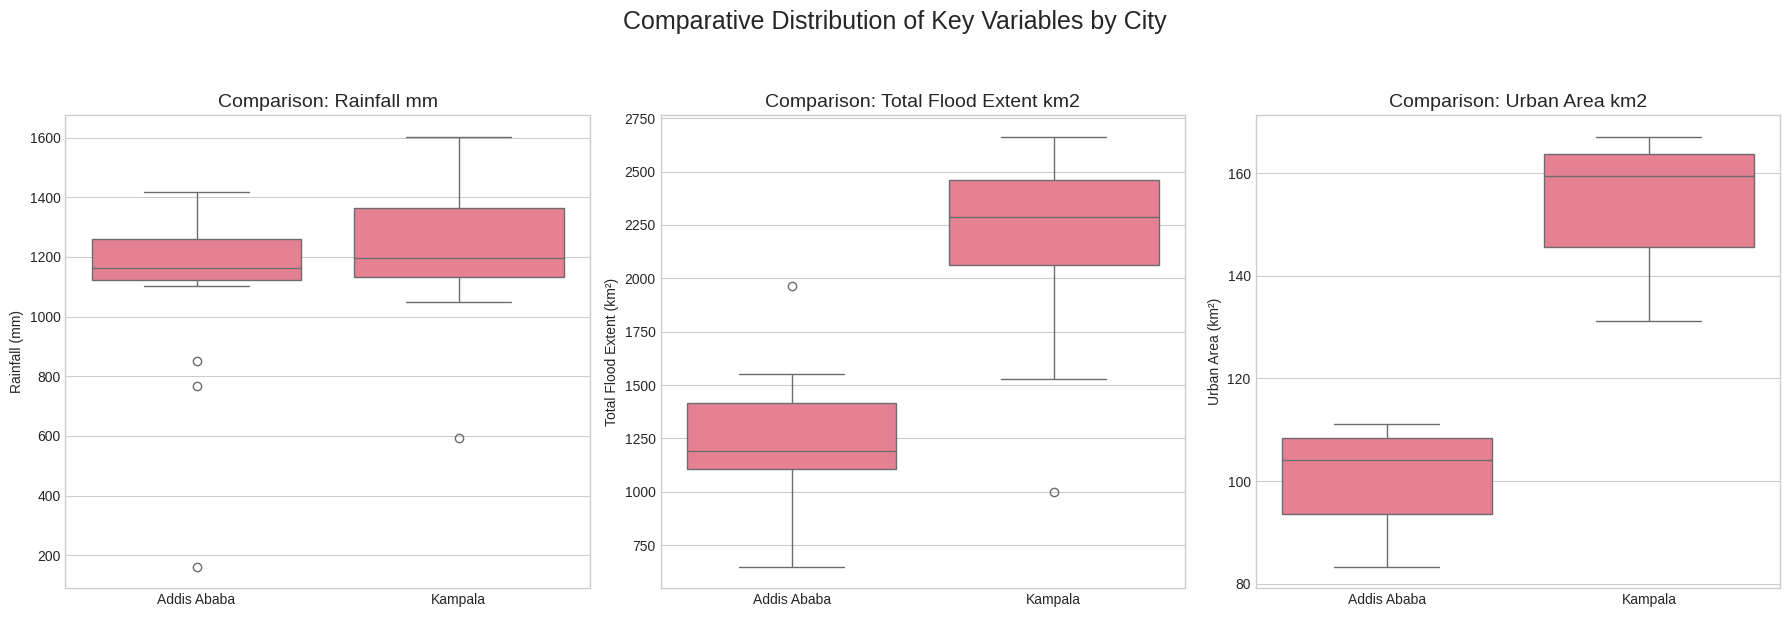

In [ ]:
# Define variables for comparison
variables_to_compare = ["Rainfall_mm", "Total_Flood_Extent_km2", "Urban_Area_km2"]
addis_data = df[df["City"] == "Addis Ababa"]
kampala_data = df[df["City"] == "Kampala"]

# Visualize the comparisons using boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Comparative Distribution of Key Variables by City", fontsize=18, y=1.02)

for i, var in enumerate(variables_to_compare):
    sns.boxplot(ax=axes[i], x="City", y=var, data=df)
    axes[i].set_title(f"Comparison: {var.replace('_', ' ')}", fontsize=14)
    axes[i].set_ylabel(
        var.replace("_", " ").replace(" mm", " (mm)").replace(" km2", " (km²)")
    )
    axes[i].set_xlabel("")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Conclusion

This analysis explored the dynamics between urbanization, rainfall, and flooding in Addis Ababa and Kampala. The key findings are:

- **Significant Urban Growth:** Both cities experienced significant and steady urban expansion over the observed period.
- **Complex Correlation:** While overall data suggested a positive link between urban area and flood extent, per-city analysis revealed a more complex, negative correlation. This suggests that other factors, such as topography, infrastructure, or specific rainfall events, play a crucial role and that city-level analysis is essential.
- **Time Series Trends:** Urban area shows a clear non-stationary (trending) behavior. In contrast, rainfall was found to be stationary, while flood extent was non-stationary, indicating its dynamics are likely influenced by more than just rainfall.